<a href="https://colab.research.google.com/github/Bob-Gohardani/Machine-Learning/blob/main/Latent_Semantic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from builtins import range
from sklearn.decomposition import TruncatedSVD

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [12]:
wordnet_lemmatizer = WordNetLemmatizer()

In [13]:
titles = [line.rstrip() for line in open('all_book_titles.txt')]
# copy tokenizer from sentiment example
stop_words = set(w.rstrip() for w in open('stopwords.txt'))

In [14]:
# add these words to stop words (typical words repeated in many book titles)
stop_words = stop_words.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth'
})

In [15]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) 
    tokens = [t for t in tokens if len(t) > 2] 
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stop_words] 
    # check if any token word includes a digit, if yes omit that word form tokens
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [16]:
word_index_map = {}
current_index  = 0
all_tokens = []
all_titles = []
index_word_map = []

In [17]:
for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') 
        all_titles.append(title)
        tokens = my_tokenizer(title)

        # each of these 'tokens' is a book title
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)

In [18]:
# create a binary vector (only true if a word exists)
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [19]:
N = len(all_tokens)
D = len(word_index_map)

print(N, D)

2373 2070


In [21]:
# In this example we are treating each word as a sample, and the vector of counts of documents as a feature vector
# this is term-documnet-matrix not document-term-matrix
X = np.zeros((D, N))
X.shape

(2070, 2373)

In [22]:
i= 0
for tokens in all_tokens:
    '''
    : all rows | i specific column
    each column of our data matrix is the vector of a book title that we have which includes how many of unique words have been existing in it
    each row of our data matrix is a unique word
    therefore each row of our data matrix is the vector of each of our unique words, so we can find most similar words with each other
    '''
    X[:,i] = tokens_to_vector(tokens)
    i += 1

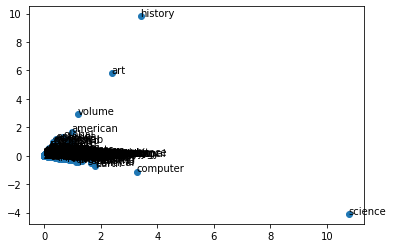

In [25]:
'''
what we do in SVD (singular value decomposition) here is that reduce dimentionality of each word from len(N) to only 2 dimensions 
so we can map closest words that we have together on a scatter plot:
'''
svd = TruncatedSVD()
Z = svd.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()